In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("srinivasanusuri/optimization-of-machine-downtime")

print("Path to dataset files:", path)

100%|██████████| 101k/101k [00:00<00:00, 21.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/srinivasanusuri/optimization-of-machine-downtime/versions/1


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from scipy.stats import skew, kurtosis
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("/root/.cache/kagglehub/datasets/srinivasanusuri/optimization-of-machine-downtime/versions/1/Machine Downtime.csv")

In [5]:
data.sample(5)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
2189,04-04-2022,Makino-L2-Unit1-2015,Shopfloor-L2,99.839904,5.017842,6.093961,8.7,48.6,36.8,0.848,21.712,20182.0,341.0,23.654841,2.01,No_Machine_Failure
893,19-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,71.990000,4.579306,6.138911,25.6,47.4,35.2,1.666,20.918,26605.0,285.0,25.830646,2.64,Machine_Failure
2079,05-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,110.066820,5.155116,6.597276,21.8,49.3,33.4,0.990,22.968,16198.0,383.0,35.581221,2.95,No_Machine_Failure
2374,02-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,135.658497,5.474017,7.124394,4.5,51.3,31.9,1.201,29.612,21953.0,284.0,35.580334,2.95,No_Machine_Failure
88,30-01-2022,Makino-L1-Unit1-2013,Shopfloor-L1,87.170000,4.881781,6.081348,28.7,45.4,32.6,1.527,28.087,19691.0,342.0,17.899311,3.67,Machine_Failure


# EDA

In [8]:
data.shape

(2500, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64
 9   Spindle_Vibration(?m)            2489 non-null   float64
 10  Tool_Vibration(?m)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [11]:
data.dtypes

,0
Date,object
Machine_ID,object
Assembly_Line_No,object
Hydraulic_Pressure(bar),float64
Coolant_Pressure(bar),float64
Air_System_Pressure(bar),float64
Coolant_Temperature,float64
Hydraulic_Oil_Temperature(?C),float64
Spindle_Bearing_Temperature(?C),float64
Spindle_Vibration(?m),float64


In [12]:
data.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)',
       'Spindle_Bearing_Temperature(?C)', 'Spindle_Vibration(?m)',
       'Tool_Vibration(?m)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [13]:
null_values = data.isnull()
null_count = null_values.sum()
print(null_count)

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(?C)      16
Spindle_Bearing_Temperature(?C)     7
Spindle_Vibration(?m)              11
Tool_Vibration(?m)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64


In [16]:
data.isnull().sum()

,0
Date,0
Machine_ID,0
Assembly_Line_No,0
Hydraulic_Pressure(bar),10
Coolant_Pressure(bar),19
Air_System_Pressure(bar),17
Coolant_Temperature,12
Hydraulic_Oil_Temperature(?C),16
Spindle_Bearing_Temperature(?C),7
Spindle_Vibration(?m),11


In [14]:
data.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


## Data Cleaning

In [17]:
data = data.drop(['Date', 'Machine_ID', 'Assembly_Line_No'],axis = 1)

In [18]:
data.sample(3)

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
710,125.920728,3.888835,6.347922,8.7,42.9,36.8,1.144,21.255,15217.0,323.0,22.014295,2.86,No_Machine_Failure
156,147.729713,3.895031,6.652201,21.7,52.3,32.4,1.288,31.434,20671.0,359.0,34.973004,2.90,No_Machine_Failure
1608,125.374396,3.053451,6.127478,7.4,50.3,45.1,1.481,23.543,21305.0,280.0,35.581221,3.10,No_Machine_Failure


In [19]:
data['Downtime'] = data['Downtime'].replace({'No_Machine_Failure': 1, 'Machine_Failure': 0})

In [20]:
mean_values = data.mean()

# Define a condition to filter columns (e.g., mean greater than 4)
condition = mean_values > 0

# Filter columns based on the condition
filtered_columns = mean_values[condition].index

In [21]:
for col in filtered_columns:
    data[col].fillna(mean_values[col], inplace=True)

print("DataFrame after filling NaN values in filtered columns:")
print(data)

DataFrame after filling NaN values in filtered columns:
      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
0                   71.040000               6.933725   
1                  125.330000               4.936892   
2                   71.120000               6.839413   
3                  139.340000               4.574382   
4                   60.510000               6.893182   
...                       ...                    ...   
2495               112.715506               5.220885   
2496               103.086653               5.211886   
2497               118.643165               5.212991   
2498               145.855859               5.207777   
2499                96.690000               5.936610   

      Air_System_Pressure(bar)  Coolant_Temperature  \
0                     6.284965                 25.6   
1                     6.196733                 35.3   
2                     6.655448                 13.1   
3                     6.560394                 24.4

In [22]:
mean_values = data.mean()

median_values = data.median()

mode_values = data.mode().iloc[0]

print("Mean values for each column:")
print(mean_values)

print("\nMedian values for each column:")
print(median_values)

print("\nMode values for each column:")
print(mode_values)

Mean values for each column:
Hydraulic_Pressure(bar)              101.409084
Coolant_Pressure(bar)                  4.947058
Air_System_Pressure(bar)               6.499275
Coolant_Temperature                   18.559887
Hydraulic_Oil_Temperature(?C)         47.618317
Spindle_Bearing_Temperature(?C)       35.063698
Spindle_Vibration(?m)                  1.009334
Tool_Vibration(?m)                    25.411975
Spindle_Speed(RPM)                 20274.792302
Voltage(volts)                       348.996792
Torque(Nm)                            25.234968
Cutting(kN)                            2.782551
Downtime                               0.494000
dtype: float64

Median values for each column:
Hydraulic_Pressure(bar)               96.985000
Coolant_Pressure(bar)                  4.947058
Air_System_Pressure(bar)               6.502981
Coolant_Temperature                   21.100000
Hydraulic_Oil_Temperature(?C)         47.618317
Spindle_Bearing_Temperature(?C)       35.100000
Spindle_Vibr

In [26]:
df = pd.DataFrame(data)
numeric_df = df.select_dtypes(include=[np.number])

In [27]:
skewness_values = numeric_df.apply(lambda x: skew(x.dropna()), axis=0)

kurtosis_values = numeric_df.apply(lambda x: kurtosis(x.dropna()), axis=0)

print("Skewness values for each column:")
print(skewness_values)

print("\nKurtosis values for each column:")
print(kurtosis_values)

Skewness values for each column:
Hydraulic_Pressure(bar)            0.197352
Coolant_Pressure(bar)              0.147554
Air_System_Pressure(bar)          -0.053048
Coolant_Temperature                0.108497
Hydraulic_Oil_Temperature(?C)     -0.002297
Spindle_Bearing_Temperature(?C)   -0.035971
Spindle_Vibration(?m)              0.001535
Tool_Vibration(?m)                -0.061103
Spindle_Speed(RPM)                -0.172579
Voltage(volts)                    -0.028675
Torque(Nm)                         0.030689
Cutting(kN)                        0.114054
Downtime                           0.024002
dtype: float64

Kurtosis values for each column:
Hydraulic_Pressure(bar)           -0.912504
Coolant_Pressure(bar)              1.196576
Air_System_Pressure(bar)           0.016522
Coolant_Temperature                1.581075
Hydraulic_Oil_Temperature(?C)      0.055226
Spindle_Bearing_Temperature(?C)   -0.037886
Spindle_Vibration(?m)             -0.007925
Tool_Vibration(?m)                 0.0

In [28]:
variance_values = numeric_df.var()


std_dev_values = numeric_df.std()


range_values = numeric_df.apply(lambda x: x.max() - x.min(), axis=0)


print("Variance values for each column:")
print(variance_values)

print("\nStandard Deviation values for each column:")
print(std_dev_values)

print("\nRange values for each column:")
print(range_values)

Variance values for each column:
Hydraulic_Pressure(bar)            9.137705e+02
Coolant_Pressure(bar)              9.871584e-01
Air_System_Pressure(bar)           1.647481e-01
Coolant_Temperature                7.282772e+01
Hydraulic_Oil_Temperature(?C)      1.411197e+01
Spindle_Bearing_Temperature(?C)    1.413419e+01
Spindle_Vibration(?m)              1.170615e-01
Tool_Vibration(?m)                 4.125440e+01
Spindle_Speed(RPM)                 1.480735e+07
Voltage(volts)                     2.054040e+03
Torque(Nm)                         3.736531e+01
Cutting(kN)                        3.792391e-01
Downtime                           2.500640e-01
dtype: float64

Standard Deviation values for each column:
Hydraulic_Pressure(bar)              30.228637
Coolant_Pressure(bar)                 0.993558
Air_System_Pressure(bar)              0.405892
Coolant_Temperature                   8.533916
Hydraulic_Oil_Temperature(?C)         3.756590
Spindle_Bearing_Temperature(?C)       3.759547
Sp

In [29]:
data.isnull().sum()

,0
Hydraulic_Pressure(bar),0
Coolant_Pressure(bar),0
Air_System_Pressure(bar),0
Coolant_Temperature,0
Hydraulic_Oil_Temperature(?C),0
Spindle_Bearing_Temperature(?C),0
Spindle_Vibration(?m),0
Tool_Vibration(?m),0
Spindle_Speed(RPM),0
Voltage(volts),0


In [30]:
def filter_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
0                   71.040000               6.933725   
1                  125.330000               4.936892   
2                   71.120000               6.839413   
3                  139.340000               4.574382   
4                   60.510000               6.893182   
...                       ...                    ...   
2495               112.715506               5.220885   
2496               103.086653               5.211886   
2497               118.643165               5.212991   
2498               145.855859               5.207777   
2499                96.690000               5.936610   

      Air_System_Pressure(bar)  Coolant_Temperature  \
0                     6.284965                 25.6   
1                     6.196733                 35.3   
2                     6.655448                 13.1   
3                     6.560394                 24.4   
4                     6.141238                  4.1 

<Axes: ylabel='Hydraulic_Pressure(bar)'>

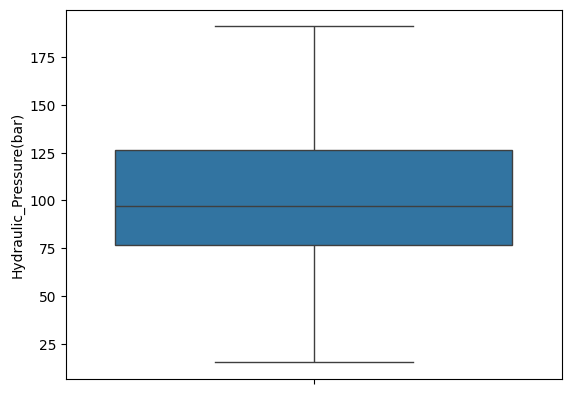

In [31]:
filtered_data = filter_outliers(data, 'Hydraulic_Pressure(bar)')
print(filtered_data)
sns.boxplot(filtered_data['Hydraulic_Pressure(bar)'])

In [32]:
data.corr()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
Hydraulic_Pressure(bar),1.000000,-0.074251,-0.029679,-0.110929,0.008604,0.022410,-0.006290,0.020873,-0.119989,-0.004002,0.161725,-0.221372,0.557075
Coolant_Pressure(bar),-0.074251,1.000000,-0.028572,0.008164,0.001264,-0.012652,0.005619,-0.005019,0.088582,0.030956,-0.102941,0.168043,-0.171003
Air_System_Pressure(bar),-0.029679,-0.028572,1.000000,0.048462,-0.025744,0.009832,0.008786,0.045392,-0.001628,0.006641,0.036527,-0.000813,-0.009182
Coolant_Temperature,-0.110929,0.008164,0.048462,1.000000,0.004371,-0.017203,0.012173,0.006582,0.072872,0.011342,-0.070351,0.096698,-0.168816
Hydraulic_Oil_Temperature(?C),0.008604,0.001264,-0.025744,0.004371,1.000000,0.040655,-0.006102,-0.015458,0.004935,0.026690,-0.006693,-0.019806,0.012606
Spindle_Bearing_Temperature(?C),0.022410,-0.012652,0.009832,-0.017203,0.040655,1.000000,-0.035360,-0.007189,0.030230,0.015012,-0.003241,0.003088,0.019444
Spindle_Vibration(?m),-0.006290,0.005619,0.008786,0.012173,-0.006102,-0.035360,1.000000,-0.019327,0.018678,0.005345,0.027937,-0.018666,0.016628
Tool_Vibration(?m),0.020873,-0.005019,0.045392,0.006582,-0.015458,-0.007189,-0.019327,1.000000,0.008341,0.021862,-0.019021,-0.038439,0.005876
Spindle_Speed(RPM),-0.119989,0.088582,-0.001628,0.072872,0.004935,0.030230,0.018678,0.008341,1.000000,-0.018346,-0.193490,0.230342,-0.274788
Voltage(volts),-0.004002,0.030956,0.006641,0.011342,0.026690,0.015012,0.005345,0.021862,-0.018346,1.000000,0.006858,-0.043255,-0.005845


In [33]:
data.shape

(2500, 13)

In [34]:
X = data.drop("Downtime",axis = 1)
y = data['Downtime']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

# StandardScaler and Logistic Regression

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.84
Confusion Matrix:
[[226  43]
 [ 47 259]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       269
           1       0.86      0.85      0.85       306

    accuracy                           0.84       575
   macro avg       0.84      0.84      0.84       575
weighted avg       0.84      0.84      0.84       575



# Random Forrest Classifier

In [39]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_train)

In [40]:
print(classification_report(y_train, y_pred))
conf_matrix = confusion_matrix(y_train, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       996
           1       1.00      1.00      1.00       929

    accuracy                           1.00      1925
   macro avg       1.00      1.00      1.00      1925
weighted avg       1.00      1.00      1.00      1925

Confusion Matrix:
[[996   0]
 [  0 929]]


In [41]:
RFC.fit(X_test, y_test)
y_pred = RFC.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       306

    accuracy                           1.00       575
   macro avg       1.00      1.00      1.00       575
weighted avg       1.00      1.00      1.00       575

Confusion Matrix:
[[269   0]
 [  0 306]]


In [43]:
RFC.fit(X_test, y_test)
y_pred = RFC.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       306

    accuracy                           1.00       575
   macro avg       1.00      1.00      1.00       575
weighted avg       1.00      1.00      1.00       575

Confusion Matrix:
[[269   0]
 [  0 306]]


In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [46]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
